<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/ModelRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install firebase-admin
import firebase_admin
import cv2 
from firebase_admin import credentials,db 
from google.colab.patches import cv2_imshow
from firebase_admin import storage 
import pandas as pd 
import csv 
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

In [0]:
cred = credentials.Certificate("credentials.json")

# Initialize the app with a service account, granting admin privileges
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'fir-4ca2c.appspot.com',
}, name='storage')

IMAGE GENERATION 

In [3]:
##GETTING NAMES  -- ##Location - SSCB and DTU : Rotated images  

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

#blobs is an interator :google.api_core.page_iterator.HTTPIterator object at 0x7f2cd11c84e0>

imglenovo = [] #has all the lenovo images by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="lenovoinS" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
      blob.download_to_filename('/content/' + "lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
      imglenovo.append("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg') 
      print("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
     
      
    

lenovo2019-06-27 17:05:48.jpeg
lenovo2019-06-27 17:10:27.jpeg
lenovo2019-06-27 17:15:58.jpeg
lenovo2019-06-27 18:04:29.jpeg
lenovo2019-06-27 18:08:53.jpeg
lenovo2019-06-27 18:17:05.jpeg
lenovo2019-06-27 18:19:07.jpeg
lenovo2019-06-27 18:26:07.jpeg
lenovo2019-06-27 18:28:53.jpeg
lenovo2019-06-27 18:35:27.jpeg
lenovo2019-06-27 18:39:31.jpeg
lenovo2019-06-27 18:47:06.jpeg
lenovo2019-06-27 18:49:07.jpeg
lenovo2019-06-27 18:56:06.jpeg
lenovo2019-06-28 06:00:07.jpeg
lenovo2019-06-28 06:04:07.jpeg
lenovo2019-06-28 06:09:28.jpeg
lenovo2019-06-28 06:14:37.jpeg
lenovo2019-06-28 06:18:53.jpeg
lenovo2019-06-28 06:25:28.jpeg
lenovo2019-06-28 06:29:29.jpeg
lenovo2019-06-28 06:35:27.jpeg
lenovo2019-06-28 06:38:53.jpeg
lenovo2019-06-28 06:44:28.jpeg
lenovo2019-06-28 06:49:29.jpeg
lenovo2019-06-28 06:56:37.jpeg
lenovo2019-06-28 07:00:28.jpeg
lenovo2019-06-28 07:04:07.jpeg
lenovo2019-06-28 07:09:28.jpeg
lenovo2019-06-28 07:13:53.jpeg
lenovo2019-06-28 07:18:53.jpeg
lenovo2019-06-28 07:23:53.jpeg
lenovo20

In [0]:
##READING THEM 

dtu=[]
sscb=[]
for img in imglenovo:
  if(img[11:16]>'07-02'):##These indicate the DTU Images - which need to be cropped and rotated 
    l=[]
    l.append(img)
    im = cv2.imread(img)
    crop = im[700:3150, 0:3120]
    crop = cv2.resize(crop, (int(np.shape(im)[1]*0.1), int(np.shape(im)[0]*0.1)))
    im = cv2.resize(crop,(256,256))
    im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_COUNTERCLOCKWISE)
    l.append(im)
    dtu.append(l)
  else:
    l=[]
    l.append(img)
    im = cv2.imread(img)           ##These indicate the SSCB Images - rotation only 
    im = cv2.resize(im, (256,256))
    im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_CLOCKWISE)
    l.append(im)
    sscb.append(l)
    
    
    

In [5]:
## CHECKING BLOCK 

print(len(dtu))
print(len(sscb))


369
502


In [6]:
##GETTING NAMES - PUNJABI BAGH 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgpb = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name.split('/')[1]=="rivers.jpg" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        blob.download_to_filename('/content/' + "pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgpb.append("pb" + str(blob.name.split('/')[-1])+ '.jpeg') 
        print("pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        

pb2019-07-03 12:46:45.jpeg
pb2019-07-03 12:47:33.jpeg
pb2019-07-03 12:48:16.jpeg
pb2019-07-03 12:49:38.jpeg
pb2019-07-03 12:50:40.jpeg
pb2019-07-03 12:51:46.jpeg
pb2019-07-03 12:52:29.jpeg
pb2019-07-03 12:53:54.jpeg
pb2019-07-03 12:54:57.jpeg
pb2019-07-03 12:56:00.jpeg
pb2019-07-03 12:57:00.jpeg
pb2019-07-03 12:58:01.jpeg
pb2019-07-03 12:58:16.jpeg
pb2019-07-03 12:59:16.jpeg
pb2019-07-03 13:01:35.jpeg
pb2019-07-03 13:02:57.jpeg
pb2019-07-03 13:03:59.jpeg
pb2019-07-03 13:04:14.jpeg
pb2019-07-03 13:05:00.jpeg
pb2019-07-03 13:05:27.jpeg
pb2019-07-03 13:06:00.jpeg
pb2019-07-03 13:06:42.jpeg
pb2019-07-03 13:08:00.jpeg
pb2019-07-03 13:08:58.jpeg
pb2019-07-03 13:10:17.jpeg
pb2019-07-03 13:11:18.jpeg
pb2019-07-03 13:12:19.jpeg
pb2019-07-03 13:13:35.jpeg
pb2019-07-03 13:14:22.jpeg
pb2019-07-03 13:15:24.jpeg
pb2019-07-03 13:16:25.jpeg
pb2019-07-03 13:17:26.jpeg
pb2019-07-03 13:18:21.jpeg
pb2019-07-03 13:19:27.jpeg
pb2019-07-03 13:20:27.jpeg
pb2019-07-03 13:21:27.jpeg
pb2019-07-03 13:22:28.jpeg
p

In [0]:
##READING IMAGES - Rotated

pb=[]
for img in imgpb:
  l=[]
  l.append(img)
  im = cv2.imread(img)
  im = cv2.resize(im, (256,256))
  im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_CLOCKWISE)
  l.append(im)
  pb.append(l)


In [8]:
print(len(pb))


483


In [0]:
# ##CHECKING BLOCK 

# cv2_imshow(pb[0])
# cv2_imshow(pb[1])


In [9]:
##GETTING NAMES - Location : DTU AND SHADIPUR 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgminote = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="minoteSSC" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        blob.download_to_filename('/content/' + "minote" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgminote.append("minote" + str(blob.name.split('/')[-1])+ '.jpeg') 
        print("minote" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        
      


minote2019-06-27 16:42:56.jpeg
minote2019-06-27 16:49:53.jpeg
minote2019-06-27 16:50:47.jpeg
minote2019-06-27 16:51:15.jpeg
minote2019-06-27 16:54:37.jpeg
minote2019-06-27 16:59:33.jpeg
minote2019-06-27 17:04:38.jpeg
minote2019-06-27 17:05:00.jpeg
minote2019-06-27 17:09:17.jpeg
minote2019-06-27 17:14:39.jpeg
minote2019-06-27 17:19:17.jpeg
minote2019-06-27 17:24:39.jpeg
minote2019-06-27 17:29:17.jpeg
minote2019-06-27 17:37:58.jpeg
minote2019-06-27 17:39:17.jpeg
minote2019-06-27 17:46:28.jpeg
minote2019-06-27 17:49:20.jpeg
minote2019-06-27 17:54:17.jpeg
minote2019-06-27 18:01:16.jpeg
minote2019-06-27 18:05:04.jpeg
minote2019-06-27 18:09:35.jpeg
minote2019-06-27 18:14:59.jpeg
minote2019-06-27 18:19:18.jpeg
minote2019-06-27 18:24:40.jpeg
minote2019-06-27 18:29:18.jpeg
minote2019-06-27 18:35:06.jpeg
minote2019-06-27 18:39:38.jpeg
minote2019-06-27 18:47:35.jpeg
minote2019-06-27 18:49:17.jpeg
minote2019-06-27 18:54:39.jpeg
minote2019-06-27 18:59:28.jpeg
minote2019-06-28 06:02:35.jpeg
minote20

In [0]:
##READING IMAGES - Location - SSCB and SHADIPUR ; Rotation 
shadipur = []
for img in imgminote : 
  if(img[11:16]>'07-05'):  ##Shadipur images needed rotating  
    l=[]
    l.append(img)
    im = cv2.imread(img)
    im = cv2.resize(im, (256,256))
    im = cv2.rotate(im, rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE)
    l.append(im)
    shadipur.append(l)
  else:
    l=[]
    l.append(img)
    im = cv2.imread(img)               ##SSCB images did not need any rotating 
    im = cv2.resize(im, (256,256))
    l.append(im)
    sscb.append(l)
    

In [11]:
print(len(shadipur))
print(len(sscb))

244
1320


In [0]:
##CHECKING BLOCK 

# cv2_imshow(minote[0])
# cv2_imshow(minote[1])
# cv2_imshow(minote[100])
# cv2_imshow(minote[900])
# cv2_imshow(minote[950])

In [12]:
##GETTING NAMES - ITO  ## DONT RUN RIGHT NOW AS THERE IS NO WEATHER DATA FOR THIS 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgito = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name.split('/')[1]=="Lenovo.JPG" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        blob.download_to_filename('/content/' + "ito" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgito.append("ito" + str(blob.name.split('/')[-1])+ '.jpeg') 
        print("ito" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        
        
        

ito2019-06-11 18:17:24.jpeg
ito2019-06-11 18:20:06.jpeg
ito2019-06-11 18:28:35.jpeg
ito2019-06-11 18:29:32.jpeg
ito2019-06-11 18:34:36.jpeg
ito2019-06-11 18:39:46.jpeg
ito2019-06-11 18:45:29.jpeg
ito2019-06-11 18:49:32.jpeg
ito2019-06-11 18:57:32.jpeg
ito2019-06-12 06:01:32.jpeg
ito2019-06-12 06:08:07.jpeg
ito2019-06-12 06:11:30.jpeg
ito2019-06-12 06:18:41.jpeg
ito2019-06-12 06:23:17.jpeg
ito2019-06-12 06:26:27.jpeg
ito2019-06-12 06:31:27.jpeg
ito2019-06-12 06:36:27.jpeg
ito2019-06-12 06:41:38.jpeg
ito2019-06-12 06:46:48.jpeg
ito2019-06-12 06:52:07.jpeg
ito2019-06-12 06:56:47.jpeg
ito2019-06-12 07:01:27.jpeg
ito2019-06-12 07:07:37.jpeg
ito2019-06-12 07:12:14.jpeg
ito2019-06-12 07:18:25.jpeg
ito2019-06-12 07:24:26.jpeg
ito2019-06-12 07:26:27.jpeg
ito2019-06-12 07:34:47.jpeg
ito2019-06-12 07:36:27.jpeg
ito2019-06-12 07:42:07.jpeg
ito2019-06-12 07:48:07.jpeg
ito2019-06-12 07:52:07.jpeg
ito2019-06-12 07:58:27.jpeg
ito2019-06-12 08:01:40.jpeg
ito2019-06-12 08:08:48.jpeg
ito2019-06-12 08:11:

In [0]:
print(len(imgito))

499


In [0]:
##READING BLOCK 

ito=[]

for img in imgito:
  l=[]
  l.append(img)
  im = cv2.imread(img)
  im = cv2.resize(im,(256,256))
  im = cv2.rotate(im, rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE)
  l.append(im)
  ito.append(l)

In [0]:
##CHECKING BLOCK 

# cv2_imshow(ito[0])
# cv2_imshow(ito[100])


In [16]:
print(np.shape(sscb))    
#print(np.shape(ito))      
print(np.shape(dtu))  
print(np.shape(shadipur))     
print(np.shape(pb))     

# print(sscb[0])
# print(ito[0])
# print(dtu[0])
# print(shadipur[0])
# print(pb[0])


(1320, 2)
(369, 2)
(244, 2)
(483, 2)


In [0]:
# k = len(sscb)
# sscb = np.reshape(sscb,(k,1))
# print(np.shape(sscb))

# k = len(pb)
# pb = np.reshape(pb,(k,1))
# print(np.shape(pb))

# k = len(ito)
# ito = np.reshape(ito,(k,1))
# print(np.shape(ito))

# k = len(dtu)
# dtu = np.reshape(dtu,(k,1))
# print(np.shape(dtu))

# k = len(shadipur)
# dtu = np.reshape(shadipur,(k,1))
# print(np.shape(shadipur))


LABEL PROCESSING 

In [0]:
##SSCB 
df = pd.read_csv('/content/sscb_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/sscb_labels_new.csv')

k=0
cpcb=[]

with open('/content/sscb_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [18]:
print(len(cpcb))

698


In [0]:
print(sscb[0])

In [0]:
##TIMESTAMP MODIFICATION 
m_tmp=[]
for tmp in sscb:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l)  
  
  

In [20]:
print(len(m_tmp))

1320


In [21]:
# print(len(m_tmp))
# print(cpcb[0])
print(m_tmp[0][0])
print(m_tmp[0][1])

lenovo2019-06-27 17:05:48.jpeg
27-06-2019 17:00


In [22]:
feat=[]
for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(transmission(im,retMean=True))
      l.append(np.ndarray.flatten(transmission(im,retMean = False)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      print('   -   -  ' + str(l))
      feat.append(l)
      
   

minote2019-06-27 16:54:37.jpeg
   -   -  ['27-06-2019 16:00', array([0.63636364, 0.63636364, 0.68181818, ..., 0.68181818, 0.68181818,
       0.68181818]), 5.071457862854004, 2.468056791148552, '47']
minote2019-06-27 16:59:33.jpeg
   -   -  ['27-06-2019 16:00', array([0.69019608, 0.69019608, 0.69803922, ..., 0.96078431, 0.96078431,
       0.96078431]), 40.19698715209961, 59.820981855775706, '47']
minote2019-06-27 16:42:56.jpeg
   -   -  ['27-06-2019 16:45', array([0.30196078, 0.30980392, 0.30980392, ..., 0.7254902 , 0.7254902 ,
       0.7254902 ]), 41.98408126831055, 60.822207739303735, '47']
minote2019-06-27 16:49:53.jpeg
   -   -  ['27-06-2019 16:45', array([0.72727273, 0.81818182, 0.81818182, ..., 0.77272727, 0.77272727,
       0.68181818]), 5.048366069793701, 2.470456806162675, '47']
minote2019-06-27 16:50:47.jpeg
   -   -  ['27-06-2019 16:45', array([0.87058824, 0.87058824, 0.8745098 , ..., 0.91764706, 0.91764706,
       0.91764706]), 42.25675964355469, 62.17865647994067, '47']
min

In [0]:
print(len(feat))

1157


In [0]:
print(feat[0])

In [0]:
##DTU

df = pd.read_csv('/content/dtu_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/dtu_labels_new.csv')

k=0
cpcb=[]

with open('/content/dtu_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [0]:
##TIMESTAMP MODIFICATION 


m_tmp=[]
for tmp in dtu:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l)  
  

In [0]:
print(len(m_tmp))

369


In [0]:
# print(cpcb[0])
print(m_tmp[0][0])
print(m_tmp[0][1])

In [25]:
for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(transmission(im,retMean=True))
      l.append(np.ndarray.flatten(transmission(im,retMean = False)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      print('   -   -  ' + str(l))
      feat.append(l)
      

lenovo2019-07-03 16:54:58.jpeg
   -   -  ['03-07-2019 16:00', array([0.41568627, 0.42352941, 0.42352941, ..., 0.99215686, 0.99215686,
       0.98431373]), 43.94867706298828, 86.06920885429538, '28.14']
lenovo2019-07-03 16:09:45.jpeg
   -   -  ['03-07-2019 16:15', array([0.43529412, 0.43921569, 0.44705882, ..., 0.98823529, 0.98431373,
       0.98431373]), 44.03278732299805, 85.93560556766379, '29.15']
lenovo2019-07-03 16:14:59.jpeg
   -   -  ['03-07-2019 16:15', array([0.45098039, 0.45098039, 0.45098039, ..., 0.99607843, 0.99607843,
       0.98823529]), 46.8581428527832, 83.35990418815406, '29.15']
lenovo2019-07-03 16:20:22.jpeg
   -   -  ['03-07-2019 16:15', array([0.47058824, 0.47058824, 0.47058824, ..., 0.99215686, 0.99215686,
       0.98823529]), 47.97339630126953, 81.99809791194996, '29.15']
lenovo2019-07-03 16:25:16.jpeg
   -   -  ['03-07-2019 16:30', array([0.49411765, 0.49411765, 0.49411765, ..., 0.99215686, 0.98823529,
       0.98823529]), 48.050804138183594, 82.01107310915145,

In [0]:
print(len(feat))

1526


In [0]:
## PUNJABI BAGH 

df = pd.read_csv('/content/pb_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/labels_pb_new.csv')


k=0
cpcb=[]

with open('/content/labels_pb_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [0]:
print(len(cpcb))

210


In [0]:
##TIMESTAMP MODIFICATION 

m_tmp=[]
for tmp in pb:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l)   

In [28]:
for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(transmission(im,retMean=True))
      l.append(np.ndarray.flatten(transmission(im,retMean = False)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      print('   -   -  ' + str(l))
      feat.append(l)

pb2019-07-03 12:53:54.jpeg
   -   -  ['03-07-2019 12:00', array([0.25446429, 0.25446429, 0.25446429, ..., 0.98214286, 0.98214286,
       0.98214286]), 43.27198028564453, 71.79568436486677, '48.3']
pb2019-07-03 12:54:57.jpeg
   -   -  ['03-07-2019 12:00', array([0.23348018, 0.23348018, 0.21585903, ..., 0.97797357, 0.97797357,
       0.97797357]), 44.84650421142578, 73.70845157017446, '48.3']
pb2019-07-03 12:56:00.jpeg
   -   -  ['03-07-2019 12:00', array([0.23580786, 0.23580786, 0.23144105, ..., 0.96943231, 0.96943231,
       0.96943231]), 45.55087661743164, 73.23119520079827, '48.3']
pb2019-07-03 12:57:00.jpeg
   -   -  ['03-07-2019 12:00', array([0.22907489, 0.22907489, 0.2246696 , ..., 0.99118943, 0.99118943,
       0.99118943]), 44.28897476196289, 71.77747304691782, '48.3']
pb2019-07-03 12:58:01.jpeg
   -   -  ['03-07-2019 12:00', array([0.22608696, 0.22608696, 0.22608696, ..., 0.96956522, 0.96956522,
       0.96956522]), 43.99489212036133, 71.24182355357836, '48.3']
pb2019-07-03 12

In [0]:
print(len(feat))

2009


In [0]:
## ITO 
'''df_ = pd.read_csv('/content/ito_labels.csv')
data_ = df_.mask(df_.eq('None')).dropna()
file_ = data_.to_csv('/content/ito_labels_new.csv')


k=0
cpcb=[]

with open('/content/ito_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) '''

In [0]:
print(len(cpcb))

706


In [0]:
##TIMESTAMP MODIFICATION 
'''m_tmp=[]
for tmp in ito:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l) '''

In [0]:
print(len(m_tmp))

499


In [0]:
'''for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(transmission(im,retMean=True))
      l.append(np.ndarray.flatten(transmission(im,retMean = False)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      print('   -   -  ' + str(l))
      feat.append(l)'''

In [0]:
print(len(feat))

2009


In [0]:
## SHADIPUR 

df_ = pd.read_csv('/content/shadipur_labels.csv')
data_ = df_.mask(df_.eq('None')).dropna()
file_ = data_.to_csv('/content/shadipur_labels_new.csv')


k=0
cpcb=[]

with open('/content/shadipur_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [0]:
print(len(cpcb))

418


In [0]:
##TIMESTAMP MODIFICATION 
m_tmp=[]
for tmp in shadipur:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l) 
 

In [0]:
print(len(m_tmp))

244


In [0]:

for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(transmission(im,retMean=True))
      l.append(np.ndarray.flatten(transmission(im,retMean = False)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      print('   -   -  ' + str(l))
      feat.append(l)

minote2019-07-06 06:02:51.jpeg
   -   -  ['06-07-2019 06:00', array([0.20866142, 0.20866142, 0.20866142, ..., 0.84645669, 0.86220472,
       0.86220472]), 51.09196472167969, 79.54891514830013, '65.12']
minote2019-07-06 06:56:50.jpeg
   -   -  ['06-07-2019 06:00', array([0.25099602, 0.25498008, 0.25498008, ..., 0.84860558, 0.84860558,
       0.84860558]), 51.513912200927734, 78.68497408220485, '65.12']
minote2019-07-06 06:08:02.jpeg
   -   -  ['06-07-2019 06:15', array([0.18972332, 0.19367589, 0.2055336 , ..., 0.83399209, 0.83399209,
       0.83399209]), 50.78607177734375, 79.7805814016487, '66.88']
minote2019-07-06 06:12:35.jpeg
   -   -  ['06-07-2019 06:15', array([0.192, 0.2  , 0.204, ..., 0.836, 0.836, 0.836]), 49.60020446777344, 79.15512153350036, '66.88']
minote2019-07-06 06:16:49.jpeg
   -   -  ['06-07-2019 06:15', array([0.20717131, 0.21115538, 0.21115538, ..., 0.82071713, 0.82868526,
       0.82868526]), 49.743465423583984, 78.35325558384844, '66.88']
minote2019-07-06 06:22:35.

In [32]:
print(len(feat))

2009


WEATHER DATA 

In [86]:
print(feat[0])

['27-06-2019 16:00', array([0.63636364, 0.63636364, 0.68181818, ..., 0.68181818, 0.68181818,
       0.68181818]), 5.071457862854004, 2.468056791148552, '47']


In [87]:
cred = credentials.Certificate('credentials.json')

# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://fir-4ca2c.firebaseio.com/'
})

ValueError: ignored

In [0]:
    
ref = db.reference()
df = ref.get()


In [89]:
temp_weather = {}

for key in df:
  try:
    l=[]
    l.append(df[key]['main']['humidity'])
    l.append(df[key]['main']['pressure'])
    l.append(df[key]['main']['temp'])
    l.append(df[key]['visibility'])
    l.append(df[key]['wind']['deg'])
    l.append(df[key]['wind']['speed'])
    l.append(df[key]['clouds']['all'])
    k = df[key]['weather'][0]['description']
    if(k=='haze'):
      l.append(0)
    elif(k=='mist'):
      l.append(1)
    elif(k=='drizzle'):
      l.append(2)
    elif(k=='dust'):
      l.append(3)
    temp_weather[key]=l
  except:
    print(key)

08-07-2019 02:52:50
08-07-2019 02:57:50


In [0]:
weather={}
for key in temp_weather:
  temp=key.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  if(j<=7.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  if(final not in weather):
    weather[final]=temp_weather[key]
  
  

In [91]:
print(weather['01-07-2019 05:30'])

[52, 999, 35.13, 3500, 250, 2.1, 40, 0]


In [104]:
hours=[]
hum=[]
pressure=[]
temp=[]
vis=[]
deg=[]
speed=[]
cc=[]
desc=[]
trans=[]
cont=[]
ent=[]
pm=[]

'''
    l.append(df[key]['main']['humidity'])
    l.append(df[key]['main']['pressure'])
    l.append(df[key]['main']['temp'])
    l.append(df[key]['visibility'])
    l.append(df[key]['wind']['deg'])
    l.append(df[key]['wind']['speed'])
    l.append(df[key]['clouds']['all'])
    k = df[key]['weather'][0]['description']
    if(k=='haze'):
      l.append(0)
    elif(k=='mist'):
      l.append(1)
    elif(k=='drizzle'):
      l.append(2)
    elif(k=='dust'):
      l.append(3)
    temp_weather[key]=l
  except:
    print(key)
'''

for e in feat:
  #print(e[0])
  hours.append(float(e[0][-5:-3]))
  pm.append(float(e[4]))
  trans.append(e[1])
  ent.append(float(e[2]))
  cont.append(float(e[3]))
  for w in weather:                                      ##Matching weather data 
    if(e[0] == w):
      hum.append(weather[w][0])
      pressure.append(weather[w][1])
      temp.append(weather[w][2]) 
      vis.append(weather[w][3])
      deg.append(weather[w][4])
      speed.append(weather[w][5])
      cc.append(weather[w][6])
      try:
        desc.append(weather[w][7])
      except:
        print(e[0])
        desc.append(0)
    
 


04-07-2019 14:30
04-07-2019 14:30
04-07-2019 14:45
04-07-2019 14:45
04-07-2019 14:45
04-07-2019 14:45
04-07-2019 15:00
04-07-2019 15:00
04-07-2019 15:00
04-07-2019 15:15
04-07-2019 15:15
04-07-2019 15:15
04-07-2019 15:30
04-07-2019 15:30
04-07-2019 16:15
04-07-2019 16:15
04-07-2019 16:15
04-07-2019 16:30
04-07-2019 16:30
04-07-2019 16:30
04-07-2019 16:45
04-07-2019 16:45
04-07-2019 16:45
04-07-2019 17:00
04-07-2019 17:00
04-07-2019 17:00
04-07-2019 17:15
04-07-2019 17:15
04-07-2019 17:15
04-07-2019 17:30
04-07-2019 17:30
04-07-2019 17:45
04-07-2019 17:45
04-07-2019 17:45
04-07-2019 17:45
04-07-2019 18:00
04-07-2019 18:45
04-07-2019 18:45
04-07-2019 18:45
04-07-2019 18:45
05-07-2019 15:15
05-07-2019 15:15
05-07-2019 15:30
05-07-2019 15:30
05-07-2019 15:30
05-07-2019 15:30
04-07-2019 14:30
04-07-2019 14:30
04-07-2019 14:30
04-07-2019 14:30
04-07-2019 14:30
04-07-2019 14:30
04-07-2019 14:30
04-07-2019 14:30
04-07-2019 14:30
04-07-2019 14:30
04-07-2019 14:30
04-07-2019 14:30
04-07-2019 16:

In [0]:
##Adding ITO's data 

In [94]:
print(len(hours))
print(hours)
print(len(trans))
# print(trans)
print(len(cont))
print(cont)
print(len(ent))
print(ent)
print(len(pm))
print(pm)
print(len(hum))
print(hum)
print(len(pressure))
print(pressure)
print(len(temp))
print(temp)
print(len(vis))
print(vis)
print(len(deg))
print(deg)
print(len(speed))
print(speed)
print(len(cc))
print(cc)
print(len(desc))
print(desc)


##with ITO - 2752 

2009
[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 

In [105]:
final_shape=len(hours)

hours = np.reshape(hours,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
pm = np.reshape(pm,(final_shape,1))
hum = np.reshape(hum,(final_shape,1))
pressure = np.reshape(pressure,(final_shape,1))
temp = np.reshape(temp,(final_shape,1))
vis = np.reshape(vis,(final_shape,1))
deg = np.reshape(deg,(final_shape,1))
speed = np.reshape(speed,(final_shape,1))
cc = np.reshape(cc,(final_shape,1))
desc = np.reshape(desc,(final_shape,1))


features = np.hstack((hours, cont, ent, hum, temp, vis, deg, speed,cc, desc, trans))

print(features[5])


# scaler = MinMaxScaler()

# hours = scaler.fit_transform(hours)
# trans = scaler.fit_transform(trans)
# cont = scaler.fit_transform(cont)
# ent = scaler.fit_transform(ent)
# hum = scaler.fit_transform(hum)
# pressure = scaler.fit_transform(pressure)
# temp = scaler.fit_transform(temp)
# vis = scaler.fit_transform(vis)
# deg = scaler.fit_transform(deg)
# speed = scaler.fit_transform(speed)
# cc = scaler.fit_transform(cc)
# des = scaler.fit_transform(desc)


features = np.hstack((hours, cont, ent, hum, temp, vis, deg, speed,cc, desc, trans))

print(features[5])

[16.         57.05897141 45.03890228 ...  0.71764706  0.70196078
  0.69019608]
[16.         57.05897141 45.03890228 ...  0.71764706  0.70196078
  0.69019608]


10.956759772593053


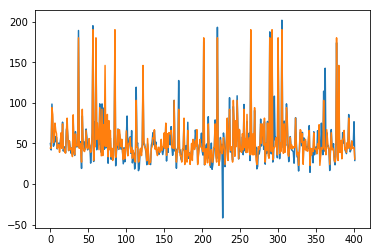

In [96]:
lineareg = LinearRegression(normalize =False)
cross = cross_val_score(lineareg, features, pm, scoring ='neg_mean_squared_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.2, random_state =42)

lineareg.fit(x_train, y_train)

pred = lineareg.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_squared_error(pred, y_test)**0.5)


#(500 IMAGES LESS THAN WITH THE PREVIOUS REGRESSOR !!!!! )


In [97]:
print(((-1)*cross)**0.5)

[ 72.62773274  24.00527255 105.81056467]


In [98]:
for i in range(0,len(pred)):
  print(str(y_test[i]) +'\t'+ str(pred[i]))
  


[44.3]	[49.79269435]
[44.]	[41.90675335]
[94.]	[98.43374113]
[85.7]	[73.96502683]
[51.]	[46.52922948]
[55.]	[49.21524091]
[75.]	[58.66639402]
[66.]	[52.05485332]
[62.]	[57.46076451]
[44.]	[43.24088531]
[48.]	[48.01518535]
[48.59]	[50.38307488]
[39.]	[45.06894928]
[46.]	[51.45031487]
[63.]	[60.63408439]
[44.]	[50.85466039]
[74.]	[76.13620391]
[45.]	[40.5694946]
[43.2]	[45.89245837]
[39.]	[44.05782486]
[38.]	[38.69899208]
[63.]	[66.68509506]
[81.1]	[70.67800611]
[57.]	[58.3625749]
[41.3]	[41.13811937]
[53.16]	[52.85018023]
[42.2]	[45.19718944]
[44.]	[37.98623887]
[44.]	[44.38294206]
[33.77]	[36.05267123]
[85.16]	[78.73596924]
[41.7]	[39.29261795]
[36.]	[35.14490693]
[61.6]	[64.52938906]
[46.84]	[46.1248664]
[48.]	[45.62363939]
[46.84]	[48.2003372]
[180.]	[189.06769134]
[44.]	[44.96491006]
[50.]	[52.24506421]
[43.5]	[49.90078409]
[27.]	[19.17942824]
[92.]	[83.86196935]
[45.1]	[49.30518712]
[41.]	[52.20523146]
[40.]	[41.90350483]
[45.1]	[45.88127806]
[66.]	[67.70117481]
[45.2]	[57.90811674

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

14.253308712538301


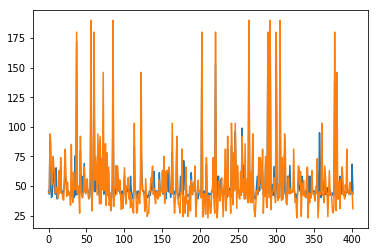

In [106]:
reg = RandomForestRegressor(max_depth=3) 
cross = cross_val_score(reg, features, pm, scoring ='neg_mean_squared_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.2, random_state =42)

reg.fit(x_train, y_train)

pred = reg.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_squared_error(pred, y_test)**0.5)


In [0]:
'''
features = np.hstack((hours, cont, ent, hum, temp, vis, deg, speed,cc, desc, trans))'''
imp = reg.feature_importances_
for i in imp:
  print(i)

In [107]:
print(((-1)*cross)**0.5)

[45.80930805 37.56799246 51.16251464]


In [108]:

for i in range(0,len(pred)):
  print(str(y_test[i]) +'\t'+ str(pred[i]))
  
  

[44.3]	45.79154353832984
[44.]	43.06848987868996
[94.]	90.12068804996682
[85.7]	47.20693557703886
[51.]	40.241087171883024
[55.]	43.06848987868996
[75.]	66.3830404438518
[66.]	62.28239162515418
[62.]	48.020267224343776
[44.]	43.06848987868996
[48.]	65.31166042515017
[48.59]	39.231622438511046
[39.]	45.670797190098476
[46.]	42.103422899921235
[63.]	45.822796770929216
[44.]	46.33793153067525
[74.]	65.33737632762838
[45.]	44.245517675706935
[43.2]	45.79154353832984
[39.]	41.29009125261632
[38.]	45.79154353832984
[63.]	53.48010899903632
[81.1]	61.162935090407395
[57.]	54.596369878949474
[41.3]	45.79154353832984
[53.16]	44.22199609849661
[42.2]	45.79154353832984
[44.]	43.06848987868996
[44.]	44.63007922412713
[33.77]	42.27273473880033
[85.16]	48.020267224343776
[41.7]	45.79154353832984
[36.]	39.217713594973645
[61.6]	61.162935090407395
[46.84]	40.241087171883024
[48.]	75.4164615557765
[46.84]	42.27273473880033
[180.]	172.14847606042596
[44.]	43.06848987868996
[50.]	44.06409434778788
[43.5]	

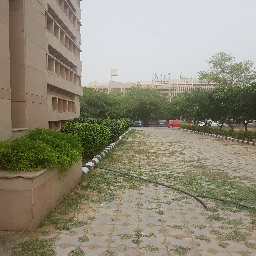

(1, 65546)
(65546,)

[41.89406591]


In [109]:
##PREDICTING THE VALUE OF A TESTING DATAPOINT   ##TO VERIFY THE CRF 

#Checking without CRF 

'''hours, cont, ent, hum, temp, vis, deg, speed,cc, desc, trans'''

img1path = '/content/20190710_142522_S7.jpg'

img1 = cv2.imread(img1path)
img1 = cv2.resize(img1,(256,256))
cv2_imshow(img1)

trans_ = np.ndarray.flatten(transmission(img1,retMean = False))
ent_ = entropy(img1)
cont_ =contrast(img1)
hour_ = 14.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53.0, 995.0, 36.51, 2000, 240, 4.1, 75, 3]



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))





# scaler = MinMaxScaler()

# hour_ = scaler.fit_transform(hour_)
# trans_ = scaler.fit_transform(trans_)
# cont_ = scaler.fit_transform(cont_)
# ent_ = scaler.fit_transform(ent_)
# hum_ = scaler.fit_transform(hum_)
# pressure_ = scaler.fit_transform(pressure_)
# temp_ = scaler.fit_transform(temp_)
# vis_ = scaler.fit_transform(vis_)
# deg_ = scaler.fit_transform(deg_)
# speed_ = scaler.fit_transform(speed_)
# cc_ = scaler.fit_transform(cc_)
# desc_ = scaler.fit_transform(desc_)



test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(np.shape(test))
print(np.shape(x_test[0]))
print()
# test = np.reshape(test,x_test[0].shape)

print(reg.predict(test))

In [110]:
print(hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_)


[[14.]] [[53.72726888]] [[36.28746796]] [[53.]] [[36.51]] [[2000]] [[240]] [[4.1]] [[75]] [[3]] [[0.56277056 0.56277056 0.54978355 ... 0.4025974  0.37229437 0.37229437]]


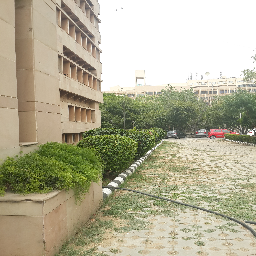

(1, 65546)
(65546,)

[58.61683222]


In [111]:

#Checking without CRF 

'''hours, cont, ent, hum, temp, vis, deg, speed,cc, desc, trans'''

img1path = '/content/20190710_142308_S4.jpeg'

img1 = cv2.imread(img1path)
img1 = cv2.resize(img1,(256,256))
cv2_imshow(img1)

trans_ = np.ndarray.flatten(transmission(img1,retMean = False))
ent_ = entropy(img1)
cont_ =contrast(img1)
hour_ = 14.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 995, 36.51, 2000, 240, 4.1, 75, 3]



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))


# scaler = MinMaxScaler()

# hour_ = scaler.fit_transform(hour_)
# trans_ = scaler.fit_transform(trans_)
# cont_ = scaler.fit_transform(cont_)
# ent_ = scaler.fit_transform(ent_)
# hum_ = scaler.fit_transform(hum_)
# pressure_ = scaler.fit_transform(pressure_)
# temp_ = scaler.fit_transform(temp_)
# vis_ = scaler.fit_transform(vis_)
# deg_ = scaler.fit_transform(deg_)
# speed_ = scaler.fit_transform(speed_)
# cc_ = scaler.fit_transform(cc_)
# desc_ = scaler.fit_transform(desc_)



test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(np.shape(test))
print(np.shape(x_test[0]))
print()
# test = np.reshape(test,x_test[0].shape)

print(reg.predict(test))

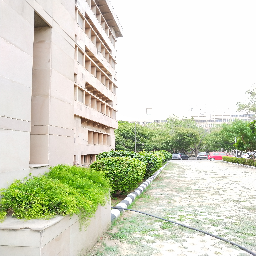

(1, 65546)
(65546,)

[62.70940744]


In [113]:

#Checking without CRF 

'''hours, cont, ent, hum, temp, vis, deg, speed,cc, desc, trans'''

img1path = '/content/20190710_142210_nokia.jpg'

img1 = cv2.imread(img1path)
img1 = cv2.resize(img1,(256,256))
cv2_imshow(img1)

trans_ = np.ndarray.flatten(transmission(img1,retMean = False))
ent_ = entropy(img1)
cont_ =contrast(img1)
hour_ = 14.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 995, 36.51, 2000, 240, 4.1, 75, 3]



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))





# scaler = MinMaxScaler()

# hour_ = scaler.fit_transform(hour_)
# trans_ = scaler.fit_transform(trans_)
# cont_ = scaler.fit_transform(cont_)
# ent_ = scaler.fit_transform(ent_)
# hum_ = scaler.fit_transform(hum_)
# pressure_ = scaler.fit_transform(pressure_)
# temp_ = scaler.fit_transform(temp_)
# vis_ = scaler.fit_transform(vis_)
# deg_ = scaler.fit_transform(deg_)
# speed_ = scaler.fit_transform(speed_)
# cc_ = scaler.fit_transform(cc_)
# desc_ = scaler.fit_transform(desc_)



test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(np.shape(test))
print(np.shape(x_test[0]))
print()
# test = np.reshape(test,x_test[0].shape)

print(reg.predict(test))

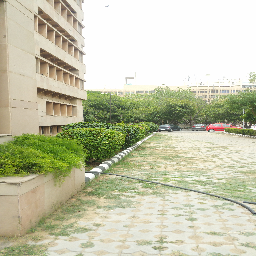

(1, 65546)
(65546,)

[67.78987014]


In [114]:

#Checking without CRF 

'''hours, cont, ent, hum, temp, vis, deg, speed,cc, desc, trans'''

img1path = '/content/20190710_141749_NOTE4.jpg'

img1 = cv2.imread(img1path)
img1 = cv2.resize(img1,(256,256))
cv2_imshow(img1)

trans_ = np.ndarray.flatten(transmission(img1,retMean = False))
ent_ = entropy(img1)
cont_ =contrast(img1)
hour_ = 14.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 995, 36.51, 2000, 240, 4.1, 75, 3]



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))





# scaler = MinMaxScaler()

# hour_ = scaler.fit_transform(hour_)
# trans_ = scaler.fit_transform(trans_)
# cont_ = scaler.fit_transform(cont_)
# ent_ = scaler.fit_transform(ent_)
# hum_ = scaler.fit_transform(hum_)
# pressure_ = scaler.fit_transform(pressure_)
# temp_ = scaler.fit_transform(temp_)
# vis_ = scaler.fit_transform(vis_)
# deg_ = scaler.fit_transform(deg_)
# speed_ = scaler.fit_transform(speed_)
# cc_ = scaler.fit_transform(cc_)
# desc_ = scaler.fit_transform(desc_)



test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(np.shape(test))
print(np.shape(x_test[0]))
print()
# test = np.reshape(test,x_test[0].shape)

print(reg.predict(test))

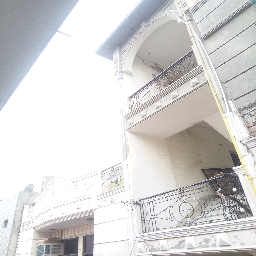

(1, 65546)
(65546,)

[69.61701212]


In [115]:
#Checking without CRF 

'''hours, cont, ent, hum, temp, vis, deg, speed,cc, desc, trans'''

img1path = '/content/20190712_064634_lenovo1.jpg'

img1 = cv2.imread(img1path)
img1 = cv2.resize(img1,(256,256))
cv2_imshow(img1)

trans_ = np.ndarray.flatten(transmission(img1,retMean = False))
ent_ = entropy(img1)
cont_ =contrast(img1)
hour_ = 14.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 995, 36.51, 2000, 240, 4.1, 75, 3]



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))





# scaler = MinMaxScaler()

# hour_ = scaler.fit_transform(hour_)
# trans_ = scaler.fit_transform(trans_)
# cont_ = scaler.fit_transform(cont_)
# ent_ = scaler.fit_transform(ent_)
# hum_ = scaler.fit_transform(hum_)
# pressure_ = scaler.fit_transform(pressure_)
# temp_ = scaler.fit_transform(temp_)
# vis_ = scaler.fit_transform(vis_)
# deg_ = scaler.fit_transform(deg_)
# speed_ = scaler.fit_transform(speed_)
# cc_ = scaler.fit_transform(cc_)
# desc_ = scaler.fit_transform(desc_)



test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(np.shape(test))
print(np.shape(x_test[0]))
print()
# test = np.reshape(test,x_test[0].shape)

print(reg.predict(test))

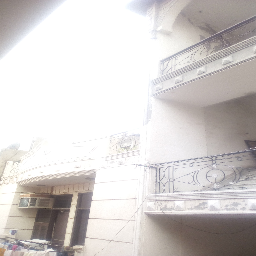

(1, 65546)
(65546,)

[55.02604292]


In [116]:
#Checking without CRF 

'''hours, cont, ent, hum, temp, vis, deg, speed,cc, desc, trans'''

img1path = '/content/20190712_064750_lenovo2.jpg'

img1 = cv2.imread(img1path)
img1 = cv2.resize(img1,(256,256))
cv2_imshow(img1)

trans_ = np.ndarray.flatten(transmission(img1,retMean = False))
ent_ = entropy(img1)
cont_ =contrast(img1)
hour_ = 14.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 995, 36.51, 2000, 240, 4.1, 75, 3]



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))





# scaler = MinMaxScaler()

# hour_ = scaler.fit_transform(hour_)
# trans_ = scaler.fit_transform(trans_)
# cont_ = scaler.fit_transform(cont_)
# ent_ = scaler.fit_transform(ent_)
# hum_ = scaler.fit_transform(hum_)
# pressure_ = scaler.fit_transform(pressure_)
# temp_ = scaler.fit_transform(temp_)
# vis_ = scaler.fit_transform(vis_)
# deg_ = scaler.fit_transform(deg_)
# speed_ = scaler.fit_transform(speed_)
# cc_ = scaler.fit_transform(cc_)
# desc_ = scaler.fit_transform(desc_)



test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(np.shape(test))
print(np.shape(x_test[0]))
print()
# test = np.reshape(test,x_test[0].shape)

print(reg.predict(test))

In [0]:
#WITH HDR IMAGES 

img=[[[0.12259017, 0.11920726, 0.11403114, ..., 0.5129577 , 0.4903323 ,
        0.4903323 ],
       [0.42909178, 0.42909178, 0.4588043 , ..., 0.4392931 , 0.4392931 ,
        0.4588043 ],
       [0.4392931 , 0.42503834, 0.42503834, ..., 0.44614413, 0.43031383,
        0.41825235],
       ...,
       [0.17974624, 0.2194744 , 0.19414636, ..., 0.18872407, 0.18868226,
        0.19038185],
       [0.18891704, 0.1888337 , 0.18931875, ..., 0.21264863, 0.21259114,
        0.21134442],
       [0.21593845, 0.20337108, 0.2097883 , ..., 0.17951377, 0.17236285,
        0.16693714]]]

cv2_imshow(img)

trans_ = np.ndarray.flatten(transmission(img2,retMean = False))
ent_ = entropy(img2)
cont_ =contrast(img2)
hour_ = 15.0



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))

scaler = MinMaxScaler()

hour_ = scaler.fit_transform(hour_)
trans_ = scaler.fit_transform(trans_)
cont_ = scaler.fit_transform(cont_)
ent_ = scaler.fit_transform(ent_)



test = np.hstack((hour_,cont_, ent_, trans_))

print(reg.predict(test))
img = cv2.resize(img2,(256,256))
cv2_imshow(img2)

trans_ = np.ndarray.flatten(transmission(img2,retMean = False))
ent_ = entropy(img2)
cont_ =contrast(img2)
hour_ = 15.0



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))

scaler = MinMaxScaler()

hour_ = scaler.fit_transform(hour_)
trans_ = scaler.fit_transform(trans_)
cont_ = scaler.fit_transform(cont_)
ent_ = scaler.fit_transform(ent_)



test = np.hstack((hour_,cont_, ent_, trans_))

print(reg.predict(test))

In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
 
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
    
  return (-1 * ent[0])

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
cross = cross_val_score(lineareg, features, pm, scoring ='neg_mean_squared_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.2, random_state =42)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)

gbrt.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
print((cross*(-1))**0.5)

[44.89280958 19.56439006 97.3282054 ]


16.37602647939767


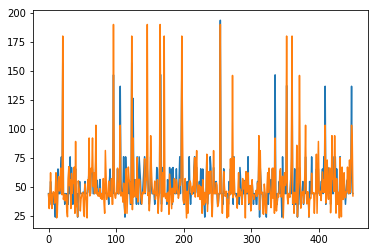

In [0]:
pred = gbrt.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_squared_error(pred, y_test)**0.5)

13.039226073743906


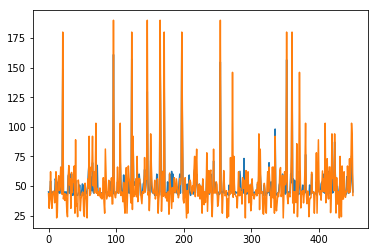

In [0]:
pred = reg.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_squared_error(pred, y_test)**0.5)

In [0]:
print(((-1)*cross)**0.5)

[44.89280958 19.56439006 97.3282054 ]


In [0]:
p